<a href="https://colab.research.google.com/github/MaryamSayed01/Mnist/blob/main/Applying_Multiple_Models_On_Mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## - Mnist is a Dataset Consist of 28*28 pixle image with 70,000 record with 10 classes (0 to 9)
# Target:
- Apply HOG In the dataset
- Apply Different Models and Compare them to each Others and decided What's the Best fit Model
___
# Models applied to the Dataset:
- K- Nearest Neighbours(KNN)
- Convolutional Neural Network(CNN)
- Random Forest(RF)

## <center> **Phase 1:Load MNIST dataset**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras
import keras.utils
from keras import utils as np_utils

In [2]:
mnist.load_data?


11501568/11490434 [==============================] - 0s 0us/step


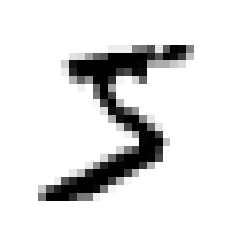

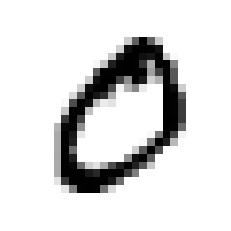

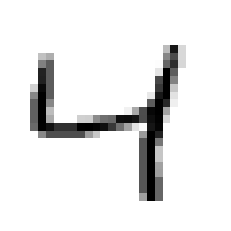

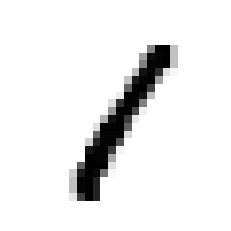

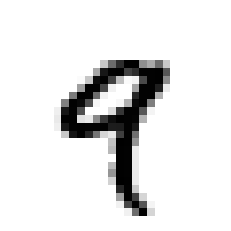

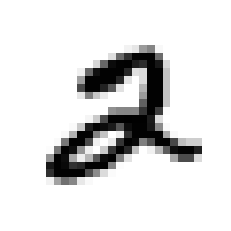

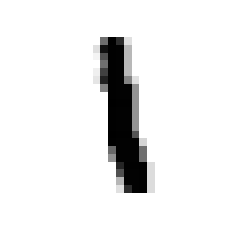

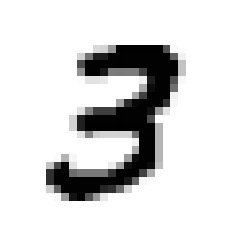

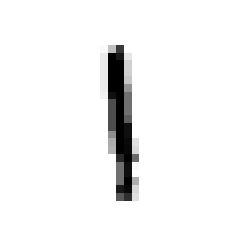

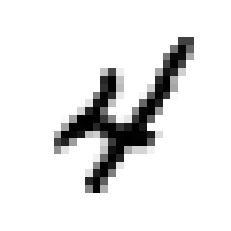

In [3]:
#Data is loaded as Matrix to Display the images we use imshow function
(X_train, y_train), (X_test, y_test)=mnist.load_data()
#ٍSee how Data imgs look like(We'll comment it in the future)
def plot_images(index):
  plt.imshow(X_train[index],cmap='binary')
  plt.axis('off')
  plt.show()
for i in range(10):
  plot_images(i)

## **Phase 2: Apply HOG features to the images**
We apply Histogram of Oriented Gradients(HOG) aiming to extract non important info from the data, such color and keep the shape that make you recognize the image anyway
## Steps: 
### In HOG we have 2 important **Value Gradients** and **Orientation** 
### 1- Preprocess
### 2- Calculate Gradients (x,y)
    [to find the small change in x and y axis]
    we'll get 2 matrices one for x and the other for y Changes
### 3- Calculate the Magnitude and Orientation 
    for each pixle using gradients from previous step 
    (Total Gradient Magnitude =  √[(Gx)2+(Gy)2]),Orientation (tan(Φ) = Gy / Gx)
#### 4-Calculate Histogram of Gradients 
    In this step we try to creat histogram using Gradients  oriantations
    If we divide the image into 8×8 cells and generate the histograms, we will get a 9 x 1 matrix for each cell
### 5-Normalize gradients
    We do this step to reduce lightinig that might be exsist in parts of any pic

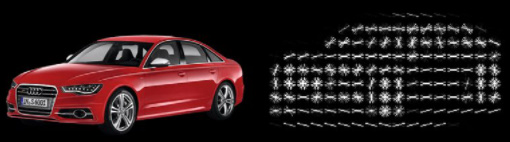

In [4]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [5]:
#1-PreProcess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
for i in range(60000):
    resized_img = resize(X_train[i], (28,28))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)#Get Gradient And oriantation
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1)) 
    X_train[i]=hog_image_rescaled

In [ ]:
from matplotlib.pyplot import imshow, show    
for img in range(15):
  plt.axis('off')
  imshow(X_train[img],cmap='gray')
  show()

In [ ]:
for i in range(10000):
    resized_img = resize(X_test[i], (28,28))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1)) 
    X_test[i]=hog_image_rescaled

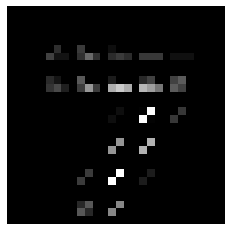

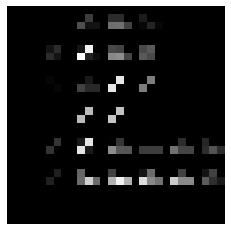

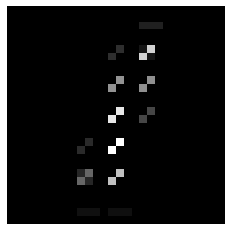

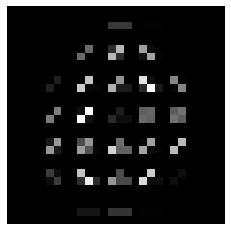

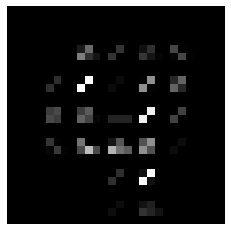

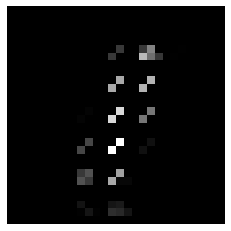

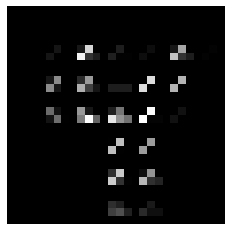

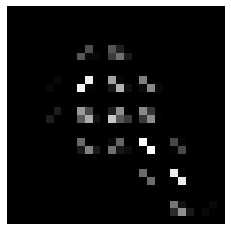

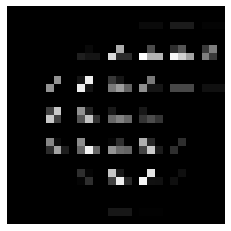

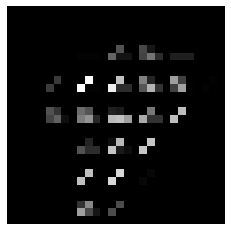

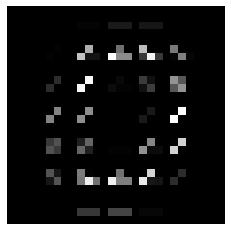

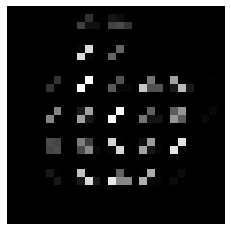

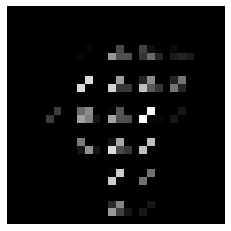

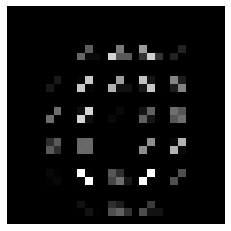

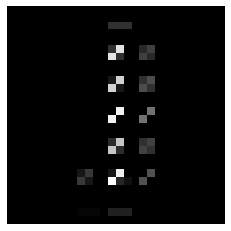

In [ ]:
for img in range(15):
  plt.axis('off')
  imshow(X_test[img],cmap='gray')
  show()

# <center>Phase 3: Applying KNN Algorithm On Mnist
Every Model gets to know and learn from the data during training, KNN's a lazy algorithm That does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
# Steps


1.  Select The Number K of neighbors 
2.  Calculate Euclidean distance of K number of neighbors
3. Take the K nearest neighbors as per the calculated Euclidean distance.
4. Among these k neighbors, count the number of the data points in each category.
5. If we got the most K neighbors from category A so We assign this point to A
6. Start Testing Your Model



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
#Reshaping The Data to Be 2d array as KNN only accept <=2D array 
x_train = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
x_test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

In [ ]:
k_values = np.arange(1,30,2)
for k in k_values:
    
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    score = KNN.score(x_test, y_test)

    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=96.67%
k=3, accuracy=96.85%
k=5, accuracy=96.87%
k=7, accuracy=96.86%
k=9, accuracy=96.88%
k=11, accuracy=96.83%
k=13, accuracy=96.84%
k=15, accuracy=96.71%
k=17, accuracy=96.76%
k=19, accuracy=96.62%
k=21, accuracy=96.59%
k=23, accuracy=96.54%
k=25, accuracy=96.55%
k=27, accuracy=96.50%
k=29, accuracy=96.47%


In [ ]:
KNN= KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
predictions = KNN.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.95      0.95      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# <center>Applying CNN (Convolution Neural Network) Model
CNN is a Deep neural Algorithm that used in many fields such Image classification that we are trying to do now.
CNN consist of many Layers:

### Features Extractions Layers:
- Convolution Layer: Extracting Features From the dataset
  - In our images dataset, with pixels it filtering it by deacreasing size without losing the relationship between each pixel and the other
- Pooling Layer: we add it after each Conv layer to reduce size of representation

##Mapping features into output to classification 
- Flatten Layer: we add it to convert the 2D input data to 1D dimensional before moving to classification step (Dense layer)
- Dense Layer: classification layer, it takes the input she got from the previous layers then classified based on its class(according to our data we'll have 10neurons as we have 10 classes[0:9])
- Dropout Layer: it helps preventing overfitting the model

We Added another Dense Layer to reduce error present.


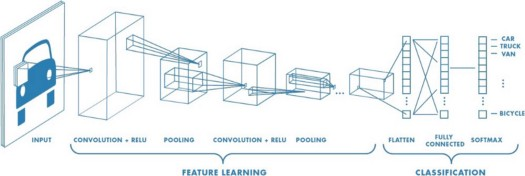

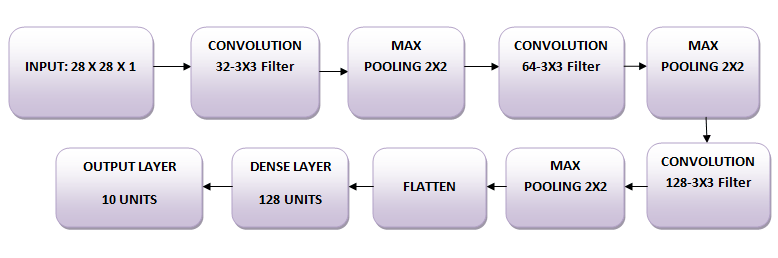

In [ ]:
import tensorflow as tf
from keras import utils as np_utils 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten()) 
cnn.add(Dense(128, activation=tf.nn.relu))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2114 - accuracy: 0.9382
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0990 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0789 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0677 - accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0598 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0519 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0469 - accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0413 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0392 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0715 - accuracy: 0.9841


[0.07147686183452606, 0.9840999841690063]

# <center>Applying Random Forest Classification Model
it's a supervised learning algorithm based on decision tree algorithms that can be used to solve both regression and classification problems

Consists of many decision trees, each decision tree consists of root node,decision node and leaf nodes that can't be divided anymore. Those nodes represent attributes that are used for predicting the outcome.

It also establishes its output based on the predictions of the decision trees built in the forest (higher number of trees gives higher precisions of the outcome (but it takes more time))
* we can control max depth through the classifier's parameters (n_estimators) affect the accuracy (increases it)

### How it works?
In decision tree algorithm the training data is divided into branches and this sequence of divisions continuous till it reaches a leaf node.

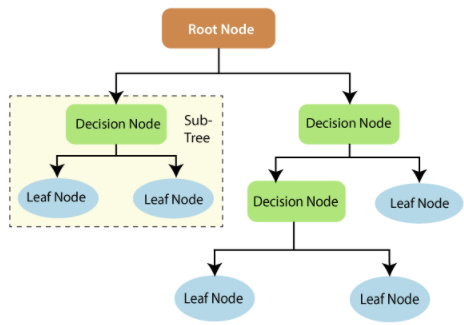

In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred=rf.predict(x_test)
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#Resources
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog
https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
https://www.programcreek.com/python/example/93846/skimage.exposure.rescale_intensity